## Analizing some E-commerce Customer Data - Whether to focus on website or to mobile application.

## The data used here is not real time data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customers = pd.read_csv("Ecommerce Customers.csv")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### As we can see the data has the following columns

In [4]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


### Some more details on the data

In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Creating a jointplot comparing Time on Website and Yearly amount spent column

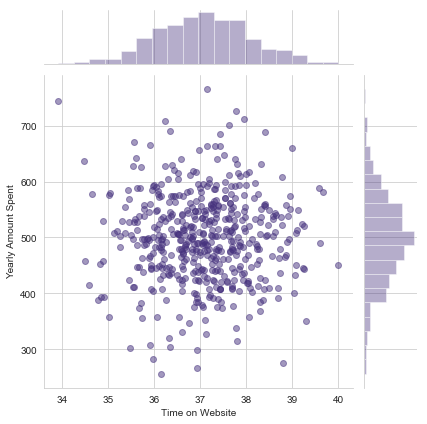

In [18]:
sns.set_palette("viridis")
sns.set_style('whitegrid')

sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers, alpha=0.5)
plt.show()

### As we can see from above, more time on website, more money spent

### Trying to do the same with Time on App column

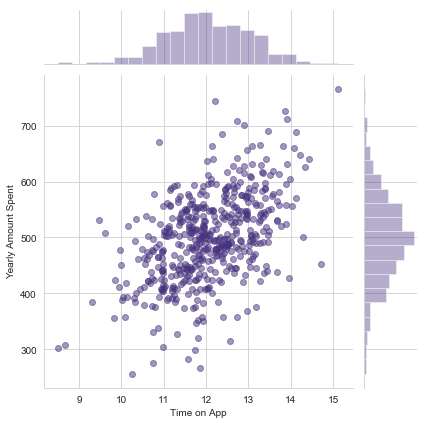

In [19]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers, alpha=0.5)
plt.show()

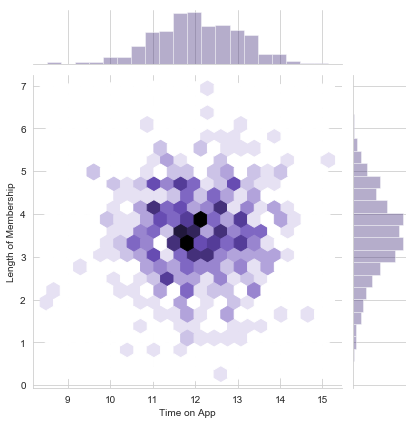

In [20]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

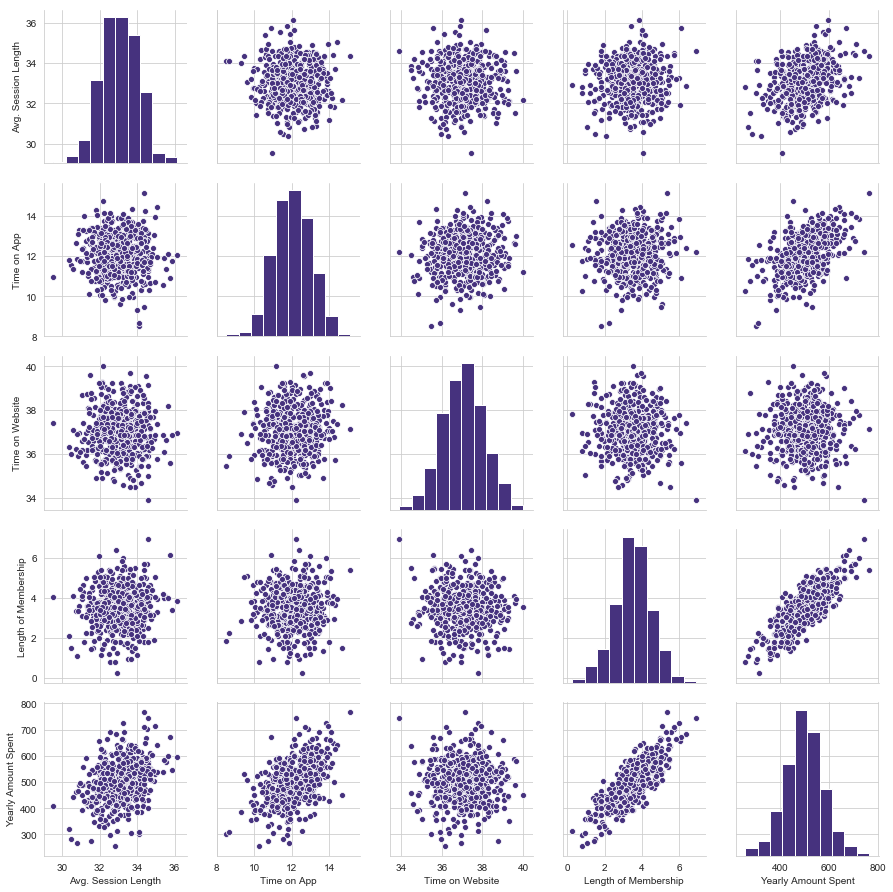

In [21]:
sns.pairplot(customers)
plt.show()

### From the above pairplot we can identify that 'Length of Membership' is the most correlated feature with Yearly Amount Spent

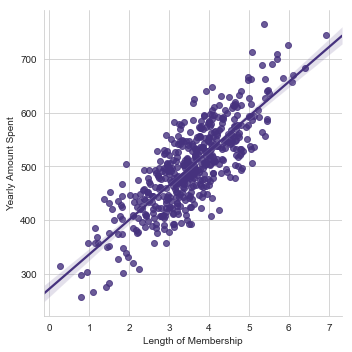

In [23]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)
plt.show()

## Training and Testing the data

In [24]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=125)

## Now training the model

In [27]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Prediction

In [28]:
prediction = lm.predict( X_test)

### Let's visualize the model's prediction with the actual prediction

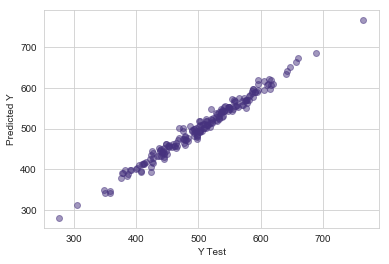

In [31]:
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### Evaluating the model's performance

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.8953336981754525
MSE: 99.05463973740007
RMSE: 9.952619742429631


### Checking the distribution of the Residuals (Observed value - Predicted Value)

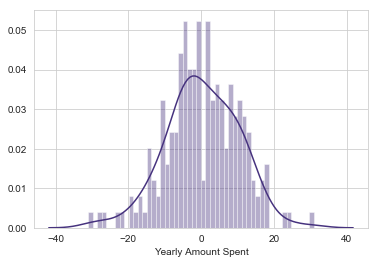

In [35]:
sns.distplot((y_test-prediction),bins=50);

### Interpreting the co-efficients

In [36]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.607743
Time on App,38.599754
Time on Website,1.057362
Length of Membership,62.099684


### From these co-efficients we can interpret two points.
### Either to develop the mobile app as it is working very nicely, or to focus on the website more to catch up with the app.